<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/Ensemble_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr
import math
import numpy as np
from matplotlib import pyplot as plt

     |████████████████████████████████| 4.3MB 4.4MB/s 
     |████████████████████████████████| 296kB 43.7MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (276 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ..

## Load ensemble forecast

In [2]:
year =  '2019'
day  =  '13'
month = '07'
hour_1  ='12'

url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_extracted_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

##Plot forecast on a map
6 hour forecast from 13/07 12:00 2019

Why do we have to de-accumuate the values?
The dataset has hourly values, so using a timestep of 6 hours just means to plot the accumulated precipitation over those 6 hours?


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: The following kwargs were not used by contour: 'extemd'


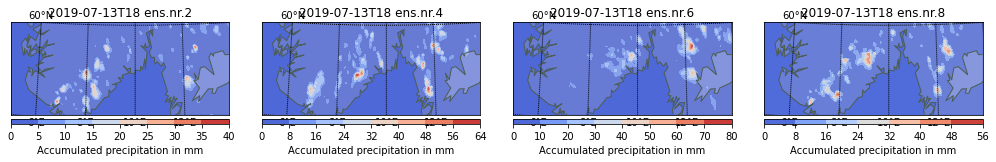

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
timestep_1=6
mlevel=0
memb1=2 # Ensemble member
memb2 = 4
memb3 = 6
memb4 = 8

fig = plt.figure(figsize=(15,15)) #11.7
gs = gridspec.GridSpec(1,4)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=60.0, llcrnrlon=5.0, urcrnrlon=14.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb1,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" ens.nr."+str(memb1))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')      

ax = plt.subplot(gs[1],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb2,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" ens.nr."+str(memb2))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

ax = plt.subplot(gs[2],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb3,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" ens.nr."+str(memb3))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

ax = plt.subplot(gs[3],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb4,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" ens.nr."+str(memb4))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

derive forecast products that combine the information of the 10 ensemble members, but still give information about the severeness (i.e. the extreme) of the forecasted weather situation?

I have heard about Brier score and skill. One of these?
Or some probabilistic presentation? 

ensemble mean or spread ould be useful

# Calculating ensemble mean and standard deviation

In [6]:
timestep1 = 12
timestep2 = 18

# hvis du bruker xarray.DataArray.isel vil du velge by integer (http://xarray.pydata.org/en/stable/indexing.html)
precip1 = forecast_1.precipitation_amount_acc.isel(time = timestep1, height0 = 0)
precip2 = forecast_1.precipitation_amount_acc.isel(time = timestep2, height0 = 0)

precip_diff = (precip2- precip1) 
precip_mean = precip_diff.mean(dim = 'ensemble_member')
precip_std = precip_diff.std(dim = 'ensemble_member')

# check dimension
print('mean dim:', precip_mean.shape,'std dim:', precip_std.shape)

mean (949, 889) std (949, 889)


# Plotting ensemble mean and std

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'extemd'
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'extemd'


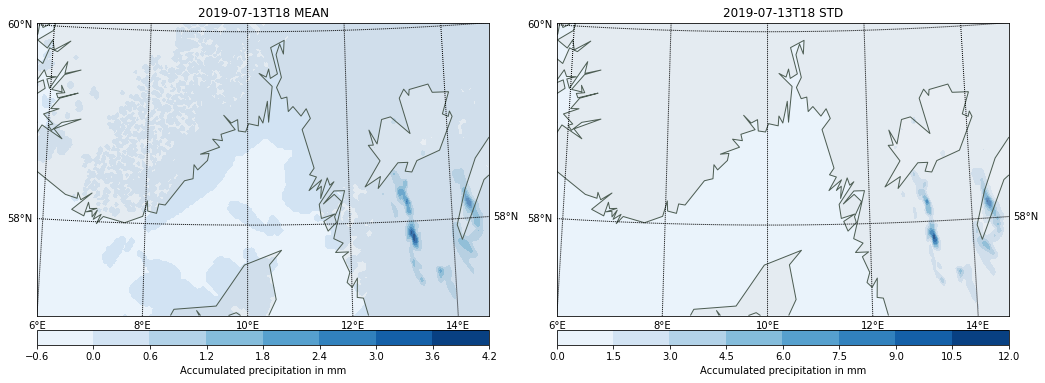

In [39]:
fig = plt.figure(figsize=(15,15)) #11.7
gs = gridspec.GridSpec(1,2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 57.0, urcrnrlat=60.0, llcrnrlon=6.0, urcrnrlon=15.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(precip_mean),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" MEAN")
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm') 

ax = plt.subplot(gs[1],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(precip_std),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" STD")
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm') 


## New forecast for next task

In [40]:
year =  '2020'
day  =  '03'
month = '02'

hour_1  ='18'

url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_extracted_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

# Fin specific point and plot forecast


In [42]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identic*l location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

RuntimeError: ignored

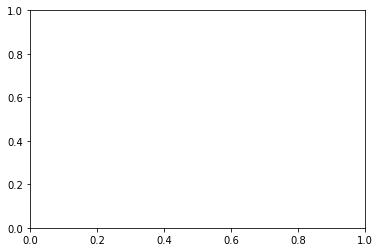

In [70]:
forc = []
for i in (np.arange(10)):
  plt.plot(forecast_1.time,forecast_1.wind_speed[:,0,i,ix,jx])
  plt.show()

In [ ]:
forc

In [72]:
[ix,jx] = findindex(forecast_1.latitude,forecast_1.longitude,69.649,18.956) # Tromsø
memb=1
for i in np.array(10):
accpp_point_forecast_1 = forecast_1.wind_speed[:,0,1,ix,jx]

from matplotlib import pyplot as plt

plt.plot(forecast_1.time, accpp_point_forecast_1, '.-')
plt.plot(forecast_1.time, accpp_point_forecast_2, '.-')
plt.plot(forecast_1.time, accpp_point_forecast_3, '.-')


IndentationError: ignored

# Plot forecast on map
MSP

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'extemd'


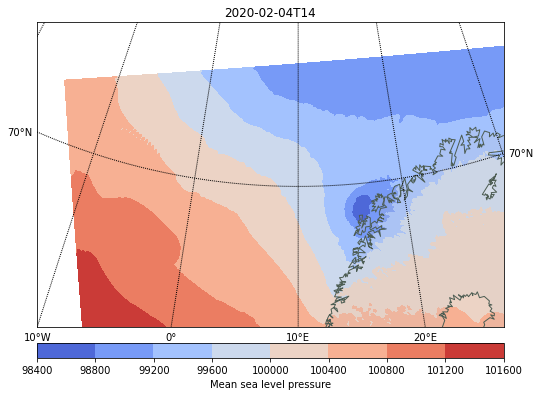

In [73]:
from mpl_toolkits.basemap import Basemap

timestep_1=20
mlevel=0
memb=7

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')                  

In [ ]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance 
    between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

tim = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
dat = np.array([500,660,580,670,650,630,620,590,680,710,
                670,690,760,770,810,820])

a,b = linreg(range(len(dat)),dat)  #//x=skade
trendline=[a*index + b for index in range(len(tim))]
trend=round(a,2)
plt.plot(tim,dat)
plt.plot(tim,trendline,label="Trend="+str(trend))
plt.legend(); plt.grid()
plt.show()